# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [819]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [820]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [821]:
df.shape

(1898, 9)

#### Observations:
The dataset has 1898 rows and 9 columns.

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [822]:
# use info() to print a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- All columns have 1898 observations.
- There are no missing values.
- restaurant_name, cuisine_type and day_of_the_week should be categorical variables.
- rating is object data type as some orders are not rated and hence do not have a numerical value.
- All other variables are numerical and hence are either int64 or float64.

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [823]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

df['restaurant_name'] = df.restaurant_name.astype('category')
df['cuisine_type'] = df.cuisine_type.astype('category')
df['day_of_the_week'] = df.day_of_the_week.astype('category')

# use info() to print a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
Now there are 3 categorical columns, 5 numeric columns and 1 object column.

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [824]:
# This code will show us a summary of both numerical and non-numerical variables.
# .T gives us a transpose of the matrix for better visualization.

df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
- American cuisine_type seems to be the most popular cuisine as it accounts for almost about a third of the total number of orders.
- More people use this app on weekends as about 70% of the orders are placed on weekends.
- About 40% of people have not given ratings. This is quite a significant amount and it will skew the results.
- The standard deviation of food_preparation_time and delivery_time are small indicating that the data points are close to the mean and not very spread out.There are no outliers and the mean is close to the median. This tells us that our food_preparation_time and delivery_time is relatively consistent and so we can design future improvements for this use case without having to factor in outliers and exceptions.

### **Question 5:** How many orders are not rated? (0.5 mark)

In [825]:
# First we select the rows in the dataframe where the rating is Not given with df[df['rating']=='Not given']
# Next we find the length of those rows which will tell us the number of orders that are not rated.

len(df[df['rating']=='Not given'])

736

#### Observations:
736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

# Lets explore the numerical variables first
1. cost_of_the_order
2. food_preparation_time
3. delivery_time

In [826]:
# This function will give a boxplot and histogram combined along the same scale for any input numerical variable.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # We are going to have 2 rows for the subplot grid.
        sharex=True,  # this indicates x-axis will be shared among the subplots.
        gridspec_kw={"height_ratios": (0.25, 0.75)}, # the height ratio of the plots would be 1:3
        figsize=figsize,)
    
    # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # a boxplot will be plotted with 
    # a green triangle representing the mean value.
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2) # a histogram will be plotted with bins if specified in the input, 
    # else it will automatically plot it's own bins.
    
    # Adding mean and median lines for histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Adding mean line.
    ax_hist2.axvline(data[feature].median(), color="red", linestyle="-")  # Adding median line.

## Observations on cost_of_the_order

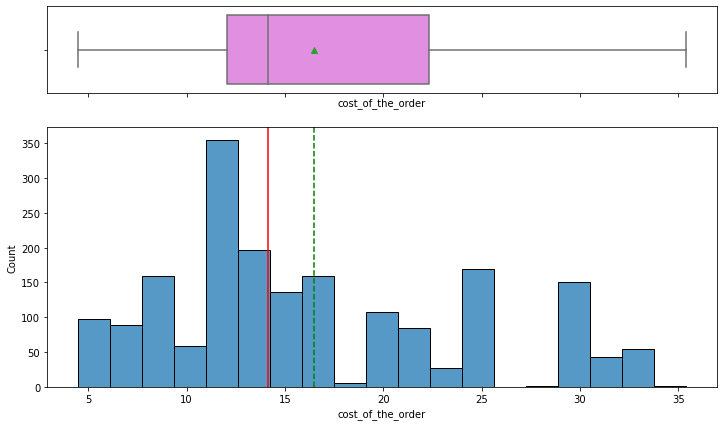

In [827]:
histogram_boxplot(df, 'cost_of_the_order')

#### Observations:

- The distribution of cost_of_the_order is skewed to the left.
- There are no outliers.
- Most of the costs_of_the_order fall between about 11 to 17.


## Observations on food_preparation_time

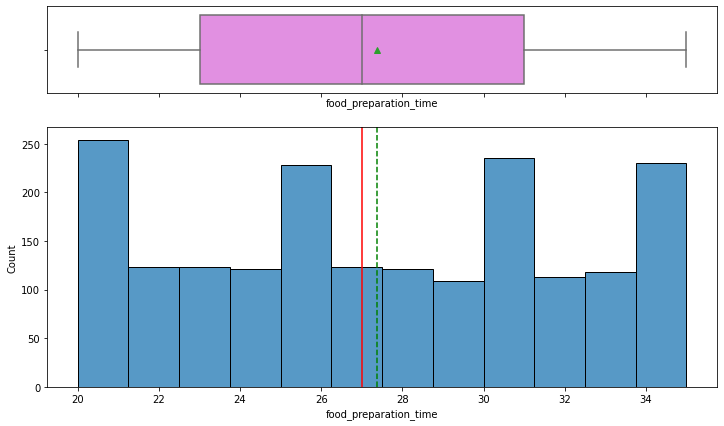

In [828]:
histogram_boxplot(df, 'food_preparation_time')

#### Observations:

- The distribution of food_preparation_time has four peaks at around 20, 25, 30 and 34 minutes.
- There are no outliers.
- The mean is close to the median.

## Observations on delivery_time

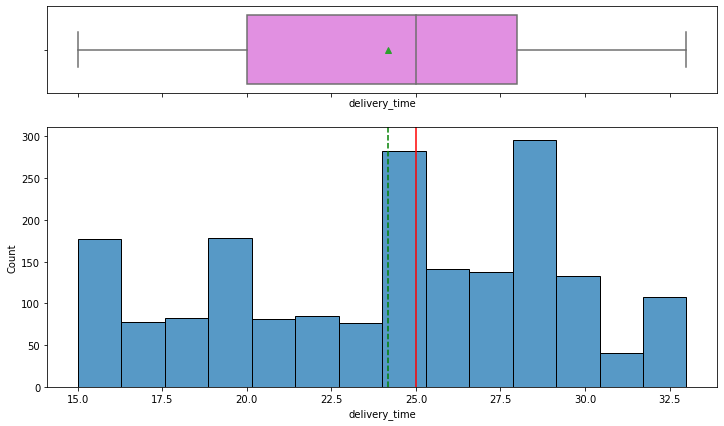

In [829]:
histogram_boxplot(df, 'delivery_time')

#### Observations:

- The distribution of delivery_time is slightly skewed to the right.
- There are no outliers.

# Now we will explore the categorical variables
1. cuisine_type
2. rating
3. day_of_the_week
4. restaurant_type

In [830]:
# This function will give a labeled barplot for us to explore categorical variables.


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",)  # annotate the percentage

    plt.show()  # show the plot
   
    

## Observations on cuisine_type

<Figure size 720x504 with 0 Axes>

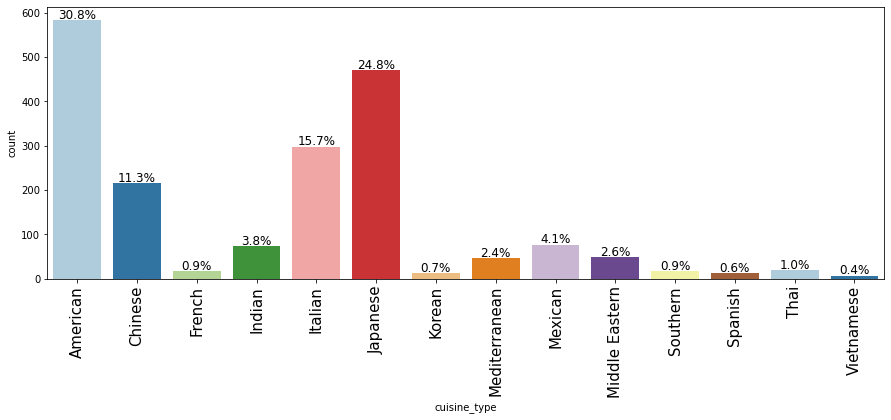

In [831]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'cuisine_type', perc=True)

#### Observations:

- American cuisine is the most popular accounting for 30.8% of the orders followed by Japanese (24.8%), Italian (15.7%) and Chinese (11.3%).
- The top four cuisine types account for more than 80% of all orders.

## Observations on rating

<Figure size 720x504 with 0 Axes>

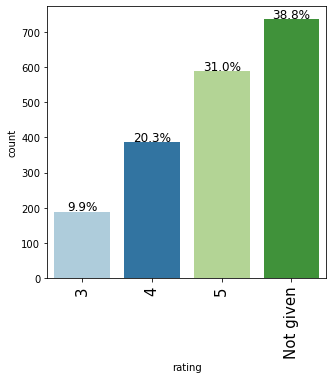

In [832]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'rating', perc=True)

#### Observations:

- Majority (38.8%) of the ratings are not given and this affects our ability to understand the true ratings score.
- Among those ratings that have been given by customers, more than 50% of the ratings are 5 and more than 80% are equal to or greater than 4.
- We do not have any ratings of 0, 1 and 2 which is very good.

## Observations on day_of_the_week

<Figure size 720x504 with 0 Axes>

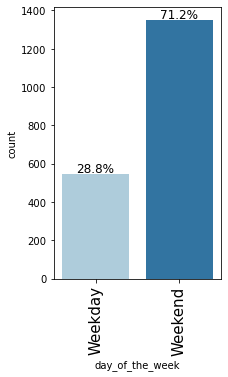

In [833]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'day_of_the_week', perc=True)

#### Observations:

- Almost three quarter (71.2%) of the orders are on weekends.

## Observations on restaurant_name

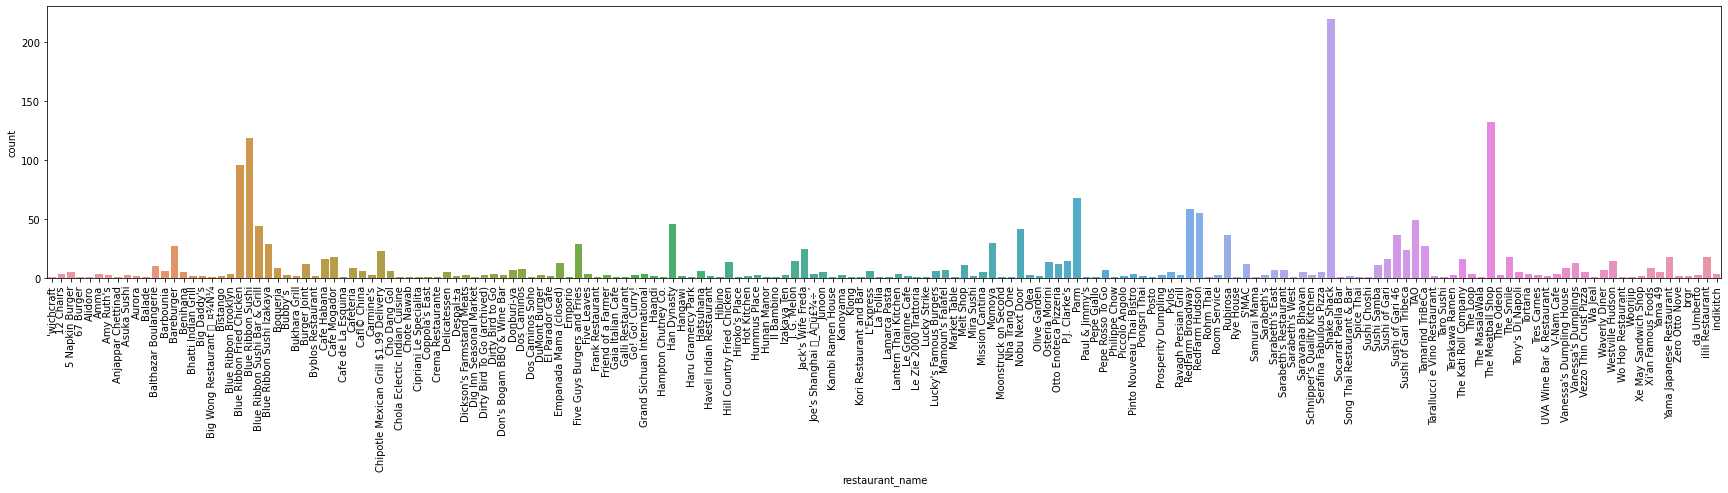

In [834]:
plt.figure(figsize = (30,5)) # To resize the plot
sns.countplot(df['restaurant_name']) # This gives us a countplot that shows us how many times each restaurant shows up.
plt.xticks(rotation=90) # This is to rotate the labels on the x-axis by 90degrees.
plt.show() # This shows us the plot.


#### Observations:

- There are a few resturants that are very popular, the most being Shake Shack, followed by The Meatball Shop and then Blue Ribbon Sushi.

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [835]:
# value_counts() will tell us how many times each restaurant shows up.
# nlargest(5) will give us the top 5 restaurants that recieved the highest number of orders.

print (df['restaurant_name'].value_counts().nlargest(5))

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
- The top 5 popular restaurants in order of most popular are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.
- Shake Shack is very popular with the highest number of orders.
- Both Blue Ribbon Sushi and Blue Ribbon Fried Chicken are popular and if Blue Rubbon is the parent company, that would be comparable to Shake Shack (119+96=215)

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [836]:
# First we select the rows with day_of_the_week = weekend with df['day_of_the_week']=='Weekend'
# Next we find the number of each cuisine_type with value_counts()
# Then to find the most popular cusine we use nlargest(1)

print (df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().nlargest(1))


American    415
Name: cuisine_type, dtype: int64


#### Observations:
- The most popular cuisine on weekends is American cuisine.

### Further Analysis to find the most popular cuisine on weekdays.

In [837]:
# Similarly, lets find the popular cuisine type on weekdays.

print (df[df['day_of_the_week']=='Weekday']['cuisine_type'].value_counts().nlargest(1))


American    169
Name: cuisine_type, dtype: int64


#### Observations:
- American cuisine is most popular on weekdays as well.

### Further Analysis to find the top 5 popular restaurants on weekends.

In [838]:
# First we find the number of restaurants with value_counts()
# Then to find the top 5 popular we use nlargest(5)

print (df[df['day_of_the_week']=='Weekend']['restaurant_name'].value_counts().nlargest(5))


Shake Shack                  145
The Meatball Shop             95
Blue Ribbon Sushi             85
Blue Ribbon Fried Chicken     74
RedFarm Hudson                44
Name: restaurant_name, dtype: int64


#### Observations:
- We have our bulk of orders on weekends (71.2%) as identified in our univariate analysis earlier.
- On the weekends, our top 5 popular restaurants in terms of demand are firstly Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and RedFarm Hudson.
- This list is similar to our overall top 5 restaurants that we identified in Question 7 earlier except for the fifth place where it is RedFarm Hudson instead of Parm.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [839]:
# First we find the orders that cost more than 20 dollars with df[df['cost_of_the_order'] > 20]
# Second we find the length of those rows to find the total number of orders where the cost is above 20 dollars.
# Then in order to find the percentage of such orders we divide that length by the total length of the 'cost_of_the_order' 
# column and multiply that with 100

print ('Number of total orders where cost > 20 dollars:', len(df[df['cost_of_the_order'] > 20]))
print ('Percentage of such orders in the dataset:', 
       ((len(df[df['cost_of_the_order'] > 20]))/(len(df['cost_of_the_order']))*100))
    

Number of total orders where cost > 20 dollars: 555
Percentage of such orders in the dataset: 29.24130663856691


#### Observations:
- 555 orders which are about 29% of total orders have a cost of greater than $20. This is about a third of our orders.

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [840]:
# mean() gives us the mean delivery time in this dataset.

df['delivery_time'].mean()

24.161749209694417

#### Observations:
- The mean delivery time is about 24.16 minutes.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [841]:
# To find the order details of the customer who has spent the maximum amount on a single order, we use .max
# It gives the details of the order with the largest cost

print(df[df['cost_of_the_order'] == df['cost_of_the_order'].max()])

     order_id  customer_id restaurant_name   cuisine_type  cost_of_the_order  \
573   1477814        62359           Pylos  Mediterranean              35.41   

    day_of_the_week rating  food_preparation_time  delivery_time  
573         Weekday      4                     21             29  


#### Observations:
- Customer_id 62359 has spent the maximum amount of $35.41 on a single order. 
- He has purchased on a weekday from the restaurant Pylos which is a Mediterranean restaurant and has given a rating of 4.
- The order_id is 1477814, the food_preparation_time is 21 minutes and the delivery_time is 29 minutes.

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

### Bivariate Analysis
Lets plot bivariate charts between variables to explore their interaction with each other.

### Correlation

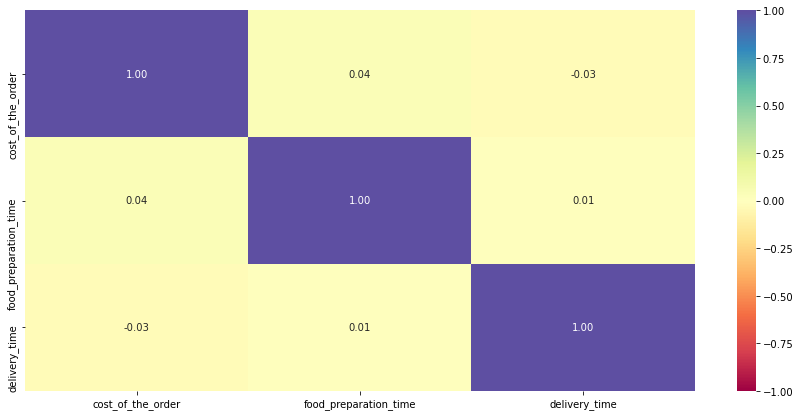

In [842]:
# We will check the correlation among the numerical variables by plotting a heatmap
num_var = ['cost_of_the_order','food_preparation_time','delivery_time']

corr = df[num_var].corr()

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, 
            yticklabels=corr.columns)
plt.show()

#### Observations:
- There doesn't seem to be any strong relationships between the numerical variables.

### Bivariate Scatter Plots

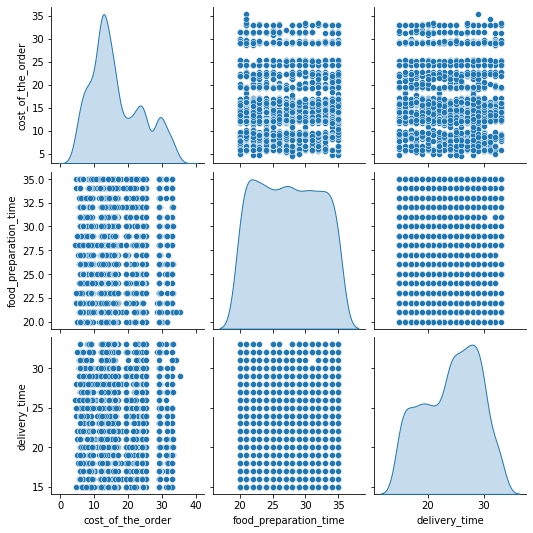

In [843]:
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

#### Observations:
- We get the same insights as from the correlation plot.
- There doesn't seem to be any strong relationships between the numerical variables.

### Relationship between Restaurant and Cost of the order

#### Restaurant vs Total sum of cost of orders

<AxesSubplot:xlabel='restaurant_name', ylabel='total cost_of_the_order'>

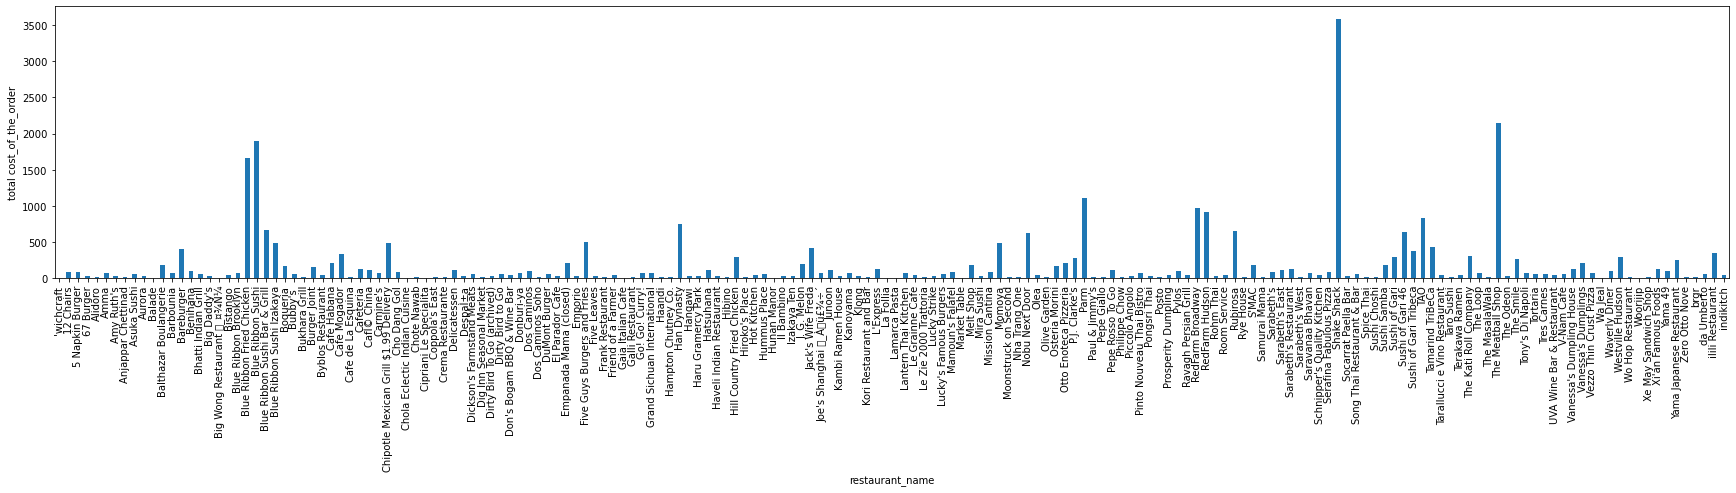

In [844]:
# We will first groupby the restaurant_name and then sum the cost of all the orders for each restaurant.
# Then we will visualize the relationship in a barplot.

grouped_df = df.groupby(['restaurant_name'])['cost_of_the_order'].sum()

grouped_df.plot(kind='bar', ylabel='total cost_of_the_order',
         xlabel='restaurant_name', figsize=(30,5))


#### Observations:
- The total cost of orders seems to be the highest for the top restaurants that we have identified earlier in our univariate analysis of restaurant name: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm. 
- These restaurants were also the ones with most number of orders.


#### Restaurant vs Mean of cost of orders

<AxesSubplot:xlabel='restaurant_name', ylabel='mean cost_of_the_order'>

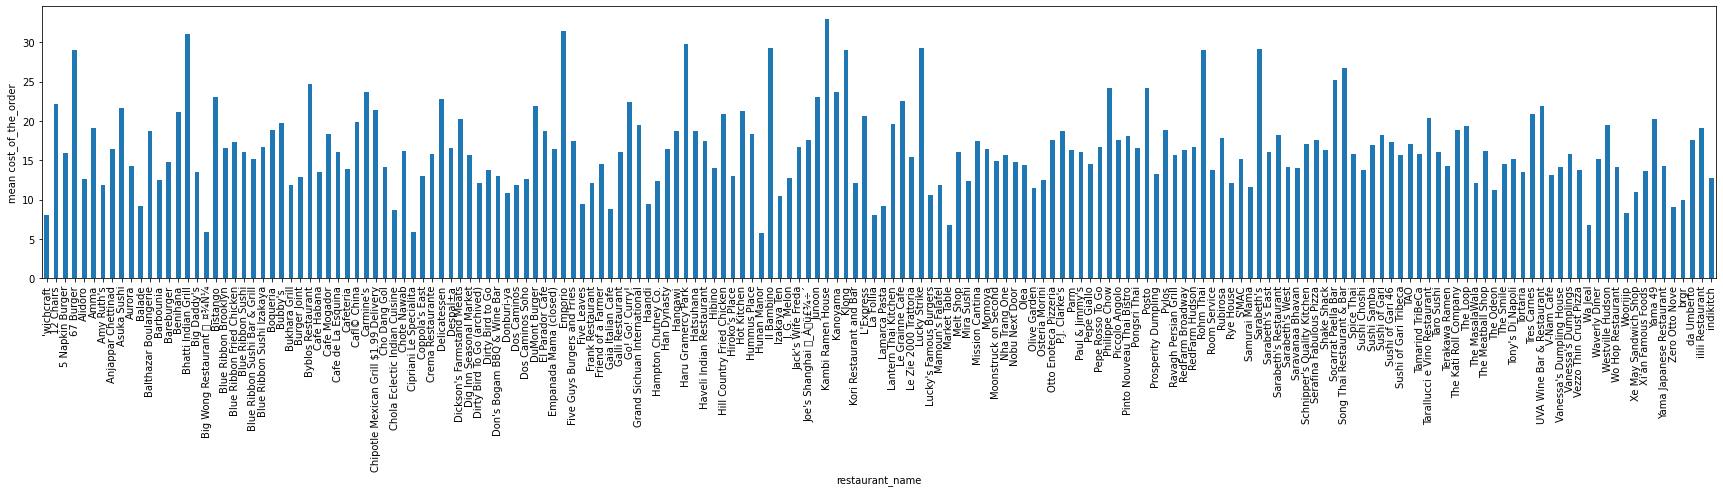

In [845]:
# We will first groupby the restaurant_name and then find the mean of the cost of orders for each restaurant_name with mean()
# Then we will visualize the relationship in a barplot.

grouped_df1_1 = df.groupby(['restaurant_name'])['cost_of_the_order'].mean()

grouped_df1_1.plot(kind='bar', ylabel='mean cost_of_the_order',
         xlabel='restaurant_name', figsize=(30,5))

#### Observations:
- The mean cost of order varies quite a bit across the different restaurants.
- Let's find the mean cost of order of our top 5 restaurants and compare it with the mean cost of order for the entire dataframe.

In [846]:
# Lets print a list of the mean cost of order for the top 5 restaurants and the mean cost of order for the entire dataframe.

list = [grouped_df1_1['Shake Shack'],grouped_df1_1['The Meatball Shop'], grouped_df1_1['Blue Ribbon Sushi'], 
        grouped_df1_1['Blue Ribbon Fried Chicken'], grouped_df1_1['Parm']]
print (list)
print ('Mean cost of order for entire dataframe:',df['cost_of_the_order'].mean())

[16.344885844748852, 16.251590909090908, 15.999579831932776, 17.315520833333334, 16.364117647058823]
Mean cost of order for entire dataframe: 16.498851422550082


#### Observations:
- The mean cost of order for each of the top 5 restaurant is close to the mean cost of order for entire dataframe.

### Relationship between Cuisine type and Cost of the order

#### Cuisine type vs Total sum of cost of orders

<AxesSubplot:xlabel='cuisine_type', ylabel='total cost_of_the_order'>

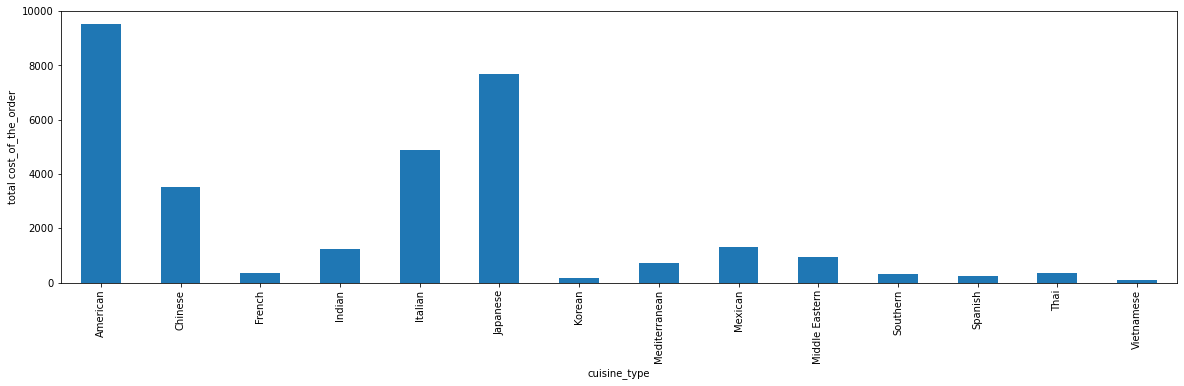

In [847]:
# We will first groupby the cuisine_type and then sum the cost of all the orders for each cuisine type.
# Then we will visualize the relationship in a barplot.

grouped_df2 = df.groupby(['cuisine_type'])['cost_of_the_order'].sum()

grouped_df2.plot(kind='bar', ylabel='total cost_of_the_order',
         xlabel='cuisine_type', figsize=(20,5))


#### Observations:
- The total cost of orders seems to be the highest for the top cuisine types that we have identified earlier in our univariate analysis of cuisine type: American cuisine type, followed by Japanese, Italian and Chinese.

#### Cusine type vs Mean of cost of orders

<AxesSubplot:xlabel='cuisine_type', ylabel='mean cost_of_the_order'>

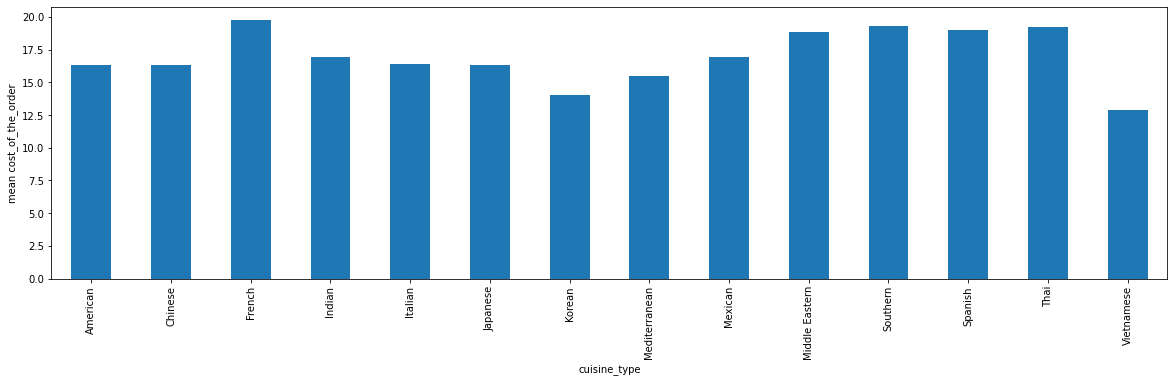

In [848]:
# We will first groupby the cuisine_type and then find the mean of the cost of all the orders for each type with mean()
# Then we will visualize the relationship in a barplot.

grouped_df2_1 = df.groupby(['cuisine_type'])['cost_of_the_order'].mean()

grouped_df2_1.plot(kind='bar', ylabel='mean cost_of_the_order',
         xlabel='cuisine_type', figsize=(20,5))

#### Observations:
- The average cost per order is fairly consistent across the different cuisines. This also supports the observations of top 4 cuisine types by order count is also the top 4 by total sum of cost of order.
- Vietnamese cuisine has the lowest mean cost per order.
- French cuisine has the highest mean cost per order.

### Relationship between Restaurant and Mean ratings

<AxesSubplot:xlabel='restaurant_name', ylabel='mean rating'>

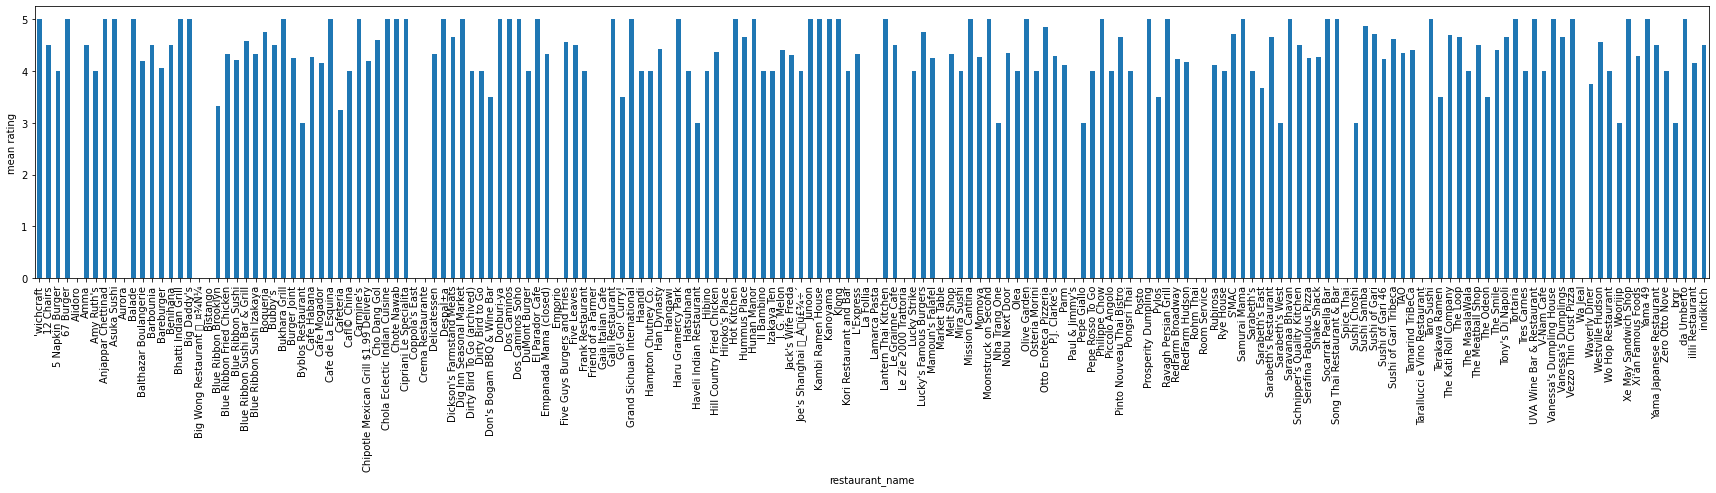

In [849]:
# We will first select rows that have numeric values (3, 4, 5 in this case) given in the ratings column and 
# create a new dataframe, df2.
# We will then convert 'rating' in df2 to 'int64' datatype so that we can perform our analysis.
# Next, we will group by restaurant names and find each of their mean ratings and visualize that relationship on a barplot.

df2 = df[df['rating'] != 'Not given']
df2['rating'] = df2.rating.astype('int64')
grouped_df3 = df2.groupby(['restaurant_name'])['rating'].mean()

grouped_df3.plot(kind='bar', ylabel='mean rating',
         xlabel='restaurant_name', figsize=(30,5))

#### Observations:
- The mean ratings seems to be generally high for most restaurants which is a good sign.
- But to find the very good restaurants in terms of both demand and rating, lets filter out the restaurants that have at least 50 and more ratings and find their mean ratings.

In [850]:
# We will create a new dataframe which will give us a value count of all the variables.
# We will then find the top 10 restaurants in terms of ratings count.

grouped_df4=df2.groupby(['restaurant_name']).count()
df3 = (grouped_df4['rating'].nlargest(10))
df3



restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
Parm                          39
RedFarm Hudson                34
TAO                           28
Rubirosa                      24
Han Dynasty                   23
Name: rating, dtype: int64

#### Observations:
- We can see that Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken have ratings count of more than 50.
- Next lets print the mean ratings of these restaurants.

In [851]:
# Lets print a list of the mean ratings for the restaurants with a rating count more than 50
list1 = [grouped_df3['Shake Shack'],grouped_df3['The Meatball Shop'], grouped_df3['Blue Ribbon Sushi'], 
         grouped_df3['Blue Ribbon Fried Chicken']]
print (list1)

[4.2781954887218046, 4.511904761904762, 4.219178082191781, 4.328125]


#### Observations:
- All the 4 restaurants have mean ratings ranging from about 4.22 to 4.51 
- This is a good sign but we can later explore on how to bring up the ratings.

### Relationship between Rating and Total delivery time

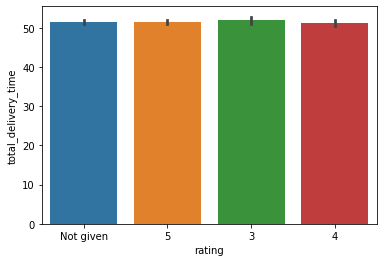

In [852]:
# Lets create a copy of the dataframe with copy()
# Then, we will create a new column named total_delivery_time which is a sum of the food_preparation_time and the 
# delivery_time.
# This will tell us the true delivery time
# Next we will plot a barplot to see the relationship between rating and total delivery time.

df_copy_1 = df.copy()
df_copy_1['total_delivery_time'] = df_copy_1['food_preparation_time'] + df_copy_1['delivery_time']
sns.barplot(df_copy_1['rating'], df_copy_1['total_delivery_time']);


#### Observations:
- There seems to be no relationship between total delivery time and rating.
- Lets break it down to food_preparation time and delivery time.

### Relationship between Rating and Food preparation time

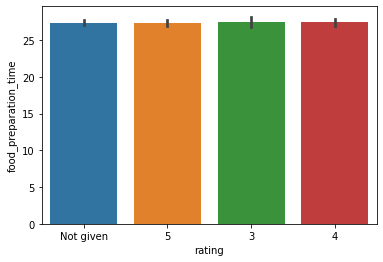

In [853]:
# This gives us a barplot to visualise the relationship between rating and food preparation time.

sns.barplot( df['rating'], df['food_preparation_time']);

#### Observations:
- Similarly, there doesnt seem to be any relationship between food preparation time and rating.

### Relationship between Rating and Delivery time 

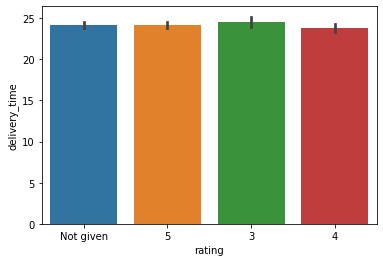

In [854]:
# This gives us a barplot to visualise the relationship between rating and delivery time.

sns.barplot( df['rating'], df['delivery_time']);

#### Observations:
- Again, there doesnt seem to be any relationship between delivery time and rating.
- It looks like rating is not affected by the food preparation time and delivery time.
- But we need to note that the majority of ratings (38.8%) are Not given and this hinders our ability to get insights into the actual ratings. 

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [855]:
# We will first select columns restaurant_name and rating in df2. 
# df2 is our dataframe with only the numeric values (3, 4, 5 in this case) in the ratings column.
# Then we will groupby the restaurant name and then filter out those rows with restaurants that have a rating count of more 
# than 50 and mean ratings greater than 4 using filter.
# Then to find the restaurants that satisfy both conditions, we will use unique()

df4 = df2[['restaurant_name', 'rating']].groupby('restaurant_name').filter(lambda x : x['rating'].count() > 50 and 
                                                                           x['rating'].mean() > 4)
df4['restaurant_name'].unique()

['Blue Ribbon Fried Chicken', 'Shake Shack', 'Blue Ribbon Sushi', 'The Meatball Shop']
Categories (4, object): ['Blue Ribbon Fried Chicken', 'Shake Shack', 'Blue Ribbon Sushi', 'The Meatball Shop']

#### Observations:
- 4 restaurants fufill the criteria to get the promotional offer. They are Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi and The Meatball Shop.
- As expected these were our top 4 restaurant that have received the highest number of orders.

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [856]:
# We will create a new column called profit_per_order in our original dataframe.
# In that column we will use if else and fill it up with values of profit generated per order according to the details 
# provided in the question.
# Then we will sum the entire column of profit_per_order and that will give us the net revenue.

def product(row):
    if row['cost_of_the_order'] > 20.00:
        return row['cost_of_the_order'] * 0.25
    elif row['cost_of_the_order'] <= 20.00 and row['cost_of_the_order'] > 5.00:
        return row['cost_of_the_order'] * 0.15
    else:
        return 0

df_copy_1['profit_per_order'] = df_copy_1.apply(product, axis=1)
total = df_copy_1['profit_per_order'].sum()

print(total)


6166.303


#### Observations:
- The net revenue generated on all orders given in the dataset is about $6166.30

### Further Analysis to find precentage of revenue by top 10% Restaurants

In [857]:
# 10% of unique 178 restaurants are 18 restaurants
# First we will groupby restaurant name and then do a sum of all the variables
# Then we find the 18 restaurants that are highest in terms of total profit per order for all their orders with nlargest()
# Next, we sum for all of the 18 restaurants
# Lastly to find the percentage, we divide it by total net revenue and mutiply it by 100

grouped_df5=df_copy_1.groupby(['restaurant_name']).sum()
df5 = (grouped_df5['profit_per_order']).nlargest(18).sum()
df5/total*100

60.231462839240955

#### Observations:
- We can see that the top 10% of restaurants contribute to 60% of our total net revenue.

### Further Analysis to find relationship between Restaurant and total profit

<AxesSubplot:xlabel='restaurant_name', ylabel='total_profit'>

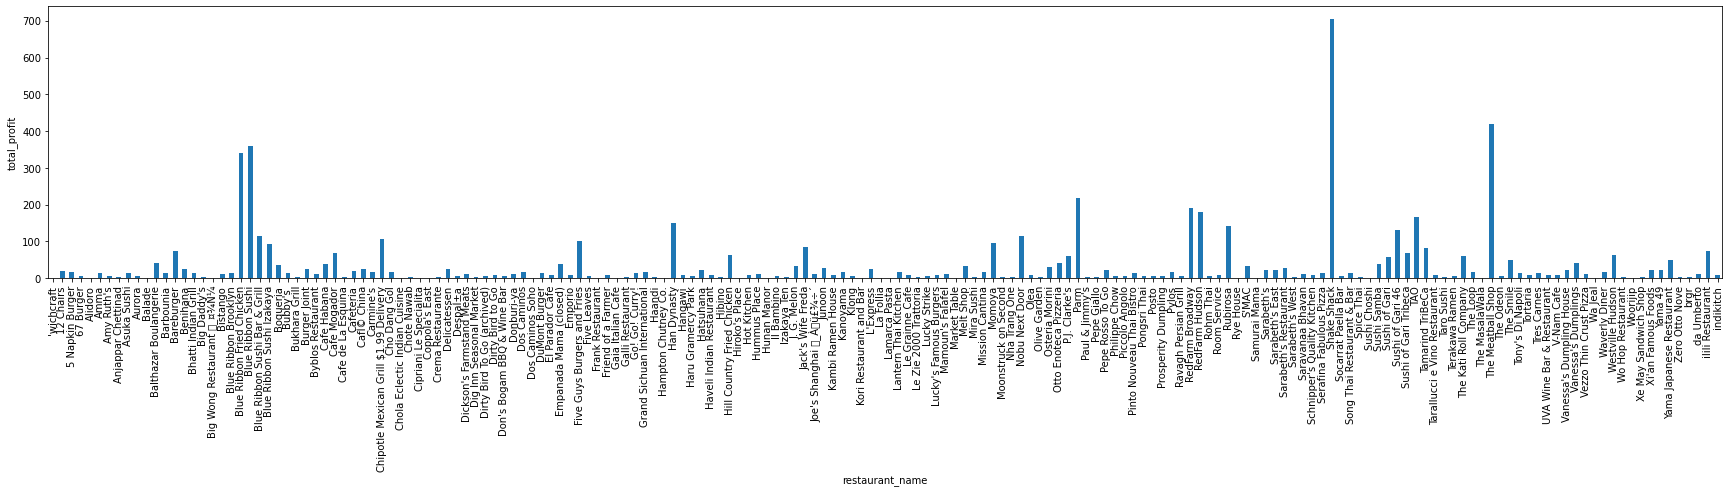

In [858]:
# We will group by restaurant names and find each of their individual total profit per order by using sum()
# We will then visualize that relationship on a barplot.

grouped_df6 = df_copy_1.groupby(['restaurant_name'])['profit_per_order'].sum()

grouped_df6.plot(kind='bar', ylabel='total_profit',
         xlabel='restaurant_name', figsize=(30,5))

#### Observations:
- From what we found out earlier, the graph also tells us that the top restaurants are contributing most to the total profits generated.

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [859]:
# First we will filter the rows in which the total delivery time is greater than 60.
# Next shape[0] will give us the number of such rows as index 0 refers to rows.
# To find the percentage, we take this number of rows and divide it by the total number of rows and mutiply it will 100

(df_copy_1[df_copy_1['total_delivery_time'] > 60].shape[0]/df.shape[0]) * 100


10.537407797681771

#### Observations:
- About 10.54% of orders have more than 60 minutes of total delivery time. 

### Further Analysis to find mean delivery time of top 5 restaurants

In [860]:
# First we will groupby restaurant name and then do a mean of all the variables
# Then we will find the mean total delivery time for our top 5 restaurants

grouped_df7=df_copy_1.groupby(['restaurant_name'])['total_delivery_time'].mean()
list2 = [grouped_df7['Shake Shack'],grouped_df7['The Meatball Shop'], grouped_df7['Blue Ribbon Sushi'], 
         grouped_df7['Blue Ribbon Fried Chicken'], grouped_df7['Parm']]
print (list2)

[52.60730593607306, 51.42424242424242, 51.865546218487395, 51.34375, 52.80882352941177]


In [861]:
# Lets find out the percentiles of our dataframe's mean total delivery time to compare it to the top restaurants' mean 
# total delivery time.
# .describe() will give us the percentile values
# .T gives a transpose of the matrix

df_copy_1.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.250,1477495.500,1.477970e+06,1.478444e+06
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.750,128600.000,2.705250e+05,4.053340e+05
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.080,14.140,2.229750e+01,3.541000e+01
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.000,27.000,3.100000e+01,3.500000e+01
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.000,25.000,2.800000e+01,3.300000e+01
total_delivery_time,1898.0,5.153372e+01,6.833603,35.00,47.000,52.000,5.600000e+01,6.800000e+01
profit_per_order,1898.0,3.248842e+00,2.295598,0.00,1.812,2.121,5.574375e+00,8.852500e+00


#### Observations:
- The mean delivery time for our top 5 restaurants fall between about 51.34 minutes and 52.87 minutes.
- When compared to the entire dataframe's mean total delivery time, this falls between the 25th and 50th percentile.

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [862]:
# First we group by the day of the week.
# Next we find the mean of the delivery time with mean()

grouped_df8 = df.groupby(['day_of_the_week'])

grouped_df8['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
- The mean delivery time on weekday is about 28.34 minutes and on weekends it is about 22.47 minutes.
- The mean delivery time is slightly greater on weekdays than on weekends.

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (5 marks)

#### Insights: 

###### Insight 1a
- Popular restaurants in terms of total demand, rating and net revenue:
    1. Shake Shack
    2. The Meatball Shop
    3. Blue Ribbon Sushi
    4. Blue Ribbon Fried Chicken
    - Top 10% of restaurants generate 60% of total net revenue.
    
- Popular Cuisine types in terms of demand: 
    1. American
    2. Chinese
    3. Italian
    4. Japanese
    - The top four cuisine types account for more than 80% of all orders.
    
###### Insight 1b
- The number of orders on weekends (71.2%) are much higher than the number of orders on weekdays (28.8%).

###### Recommendation 1
- We need to allocate more resources to and build the business with this top 10% of restaurants, especially focusing on those restaurants that are popular on weekends as that is when we have our bulk (71.2%) of orders, which is almost three-quarters. 
- We can offer more incentives to build the business with these restaurants.
- We can allocate more manpower during the weekends.
- For future analysis, we can obtain periodical data to see trends and make more improvements.

---------------
###### Insight 2
- Majority of ratings (38.8%) are Not given and this hinders our ability to get insights into the actual ratings. 
- Among those ratings that have been given by customers, more than 50% of the ratings are 5 and more than 80% are equal to or greater than 4.
- We do not have any ratings of 0, 1 and 2 which is very good.
- With the information we have, ratings doesnt seem to be affected by the delivery time. But with more ratings data, we might be able to see new patterns.

###### Recommendation 2
- Ratings on the app should be made compulsory. Have a very simple user interface, such as just selecting how many stars so as to make the process of rating simple and quick for customers.

--------------
###### Insight 3
- The top 4 restaurants have mean ratings ranging from 4.22 to 4.51

###### Recommendation 3
- Offer more incentives to the top restaurants to improve their ratings.

--------------
###### Insight 4
- When compared to the entire dataframe's mean total delivery time, the top 4 restaurants' mean total delivery time fall between the 25th and 50th percentile.

###### Recommendation 4
- We can target to reduce the top 4 restaurants' total delivery time to improve customer satisfaction. 